In [3]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

1269643


In [4]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [5]:
import ImageAnalysis3 as ia3

In [6]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [7]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231030-top8preEdit400k_zombie/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500',
             'shared_parameters':{
                     'single_im_size':[30, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':False,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 1000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231030-top8preEdit400k_zombie/
-- 19 folders, 181 fovs detected.


In [8]:
_overwrite = False

_save_images = True

_warp_image = False
_fit_spots = True


#sel_fov_ids = np.concatenate([np.arange(81, 168), np.arange(18, 20)]) # batch1+2 in mendel
sel_fov_ids = np.arange(0,120) #[114]#np.arange(0,10)
# 0-9: processed not warpped.
# 10-19: warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    break
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    #continue
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('merfish')

    # 3. Process RNA-spots as reference
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('rna')
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 19
- Number of field of views: 181
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20231030-top8preEdit400k_zombie/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 19 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20231030-top8preEdit400k_zombie/Analysis/Conv_zscan_000.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im', 'rna_ref_im'] in 7.692s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231030-top8preEdit400k_zombie/Analysis/Conv_zscan_000.hdf5
Reference channel: 637
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: /l

In [ ]:
fov.corr

In [ ]:
fov._save_to_file('merfish')

In [10]:
fov._save_to_file('rna')

-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags', 'ef_id', 'ef_im'] in 0.329s.


## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
for _hyb_fd, _info in color_usage_df.iterrows():
    print(_info, type(_info), _info==np.nan)

748       r2
637      m53
545    empty
477    beads
405     DAPI
Name: H0M1, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H0M1, dtype: bool
748       m1
637       m2
545       m3
477    beads
405      NaN
Name: H1M2, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H1M2, dtype: bool
748       m4
637       m5
545       m6
477    beads
405      NaN
Name: H2M3, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H2M3, dtype: bool
748       m7
637       m8
545       m9
477    beads
405      NaN
Name: H3M4, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H3M4, dtype: bool
748      m10
637      m11
545      m12
477    beads
405      NaN
Name: H4M5, dtype: object <class 'pandas.core.series.Series'> 748    Fa

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


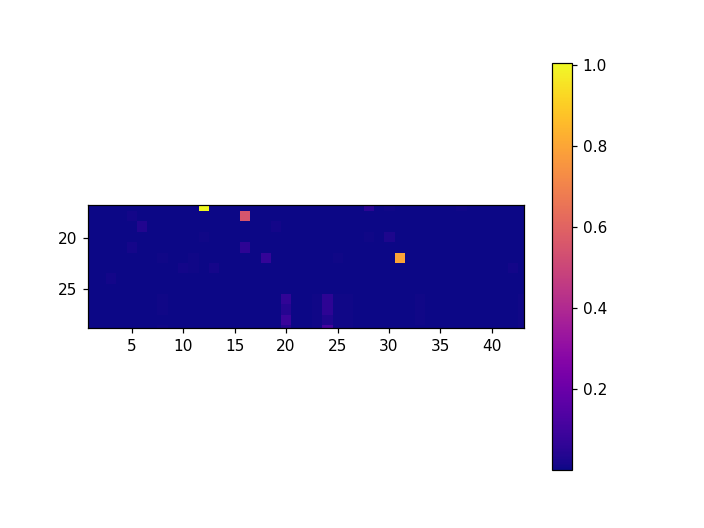

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


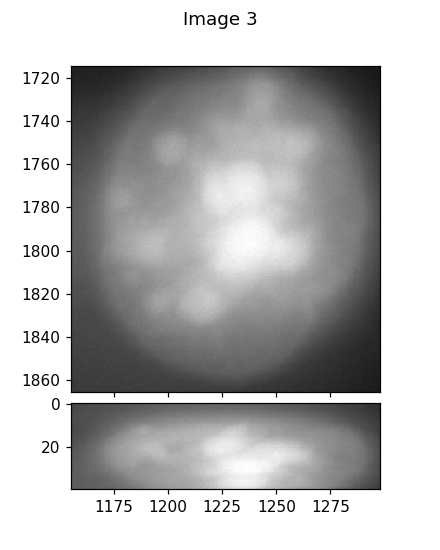

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new